# Fast Approximate Quadratic Assignment Problem (FAQ)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The graph matching problem (GMP), is meant to find an allignment of nodes between two graphs that minimizes the number of edge disagreements between those two graphs. Therefore, the GMP can be formally written as an optimization problem: 

\begin{equation}
\begin{aligned}
\min { -trace(APB^T P^T)}\\
\textrm{s.t. }  \textrm{  P is a permutation matrix} \\
\end{aligned}
\end{equation}

The Quadratic Assignment problem is a combinatorial opimization problem, modeling following the real-life problem: 

"There are a set of n facilities and a set of n locations. For each pair of locations, a distance is specified and for each pair of facilities a weight or flow is specified (e.g., the amount of supplies transported between the two facilities). The problem is to assign all facilities to different locations with the goal of minimizing the sum of the distances multiplied by the corresponding flows."

When written as an optimization problem, the QAP is represented as:

\begin{equation}
\begin{aligned}
\min { trace(APB^T P^T)}\\
\textrm{s.t. }  \textrm{  P is a permutation matrix} \\
\end{aligned}
\end{equation}

Since the GMP objective function is the negation of the QAP objective function, any algorithm that solves one can solve the other. 


This class is an implementation of the Fast Approximate Quadratic Assignment Problem (FAQ), an algorithm designed to efficiently and accurately solve the QAP, as well as GMP. 

In [31]:
from graspy.match import FastApproximateQAP as FAQ
from graspy.simulations import er_np

For the sake of tutorial, we will use FAQ to solve the GMP for two graphs where we know a solution exists. 
Below, we sample a binary graph (undirected and no self-loops) $G_1 \sim ER_{NP}(50, 0.3)$.
Then, we randomly shuffle the nodes of $G_1$ to initiate $G_2$.
The number of edge disagreements as a result of the node shuffle is printed below.

In [26]:
n = 50
p = 0.3

np.random.seed(1)
G1 = er_np(n=n, p=p)
node_shuffle_input = np.random.permutation(n)
G2 = G1[np.ix_(node_shuffle_input, node_shuffle_input)]
print(sum(sum(abs(G1-G2))))

1012.0


# Visualize the graphs using heat mapping

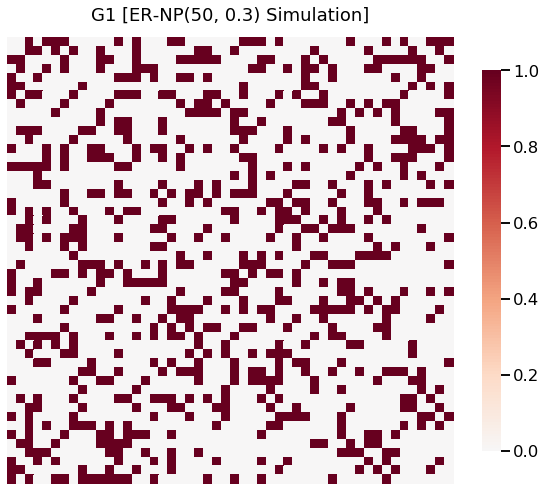

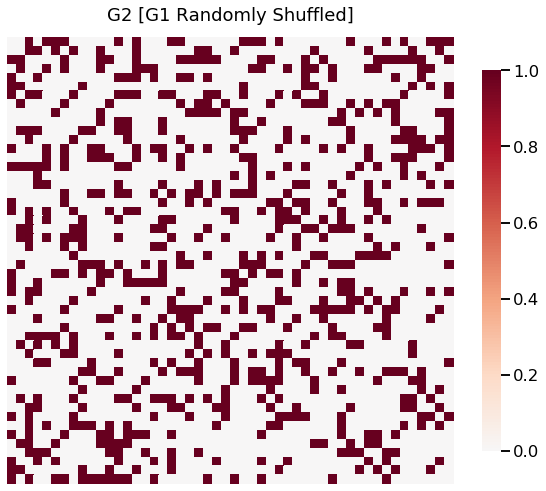

In [32]:
from graspy.plot import heatmap
heatmap(G1, title = 'G1 [ER-NP(50, 0.3) Simulation]')
heatmap(G2, title = 'G2 [G1 Randomly Shuffled]')

Below, we create a model designed to solve GMP. The model is then fitted for the two graphs $G_1$ and $G_2$. One of the option for the algorithm is the starting position of $P$. In this case, the class default of barycenter intialization is used, or the flat doubly stochastic matrix. The number of edge disagreements is printed below. With zero edge disagreements, we see that FAQ is successful in unshuffling the graph.

In [33]:
GMP = FAQ(gmp=True)
unshuffle = GMP.fit(G1,G2)
G2 = G2[np.ix_(unshuffle.perm_inds_, unshuffle.perm_inds_)]
print(sum(sum(abs(G1-G2))))

0.0


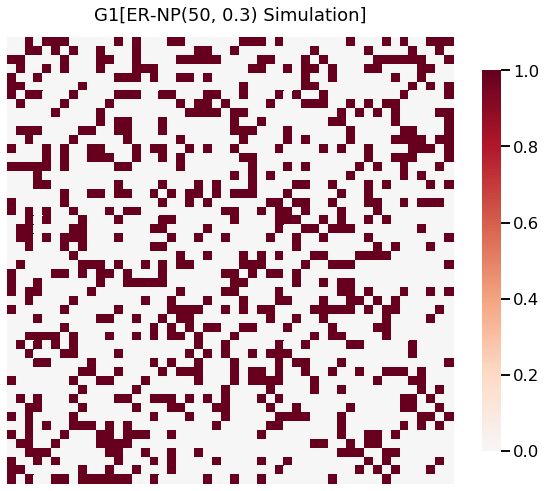

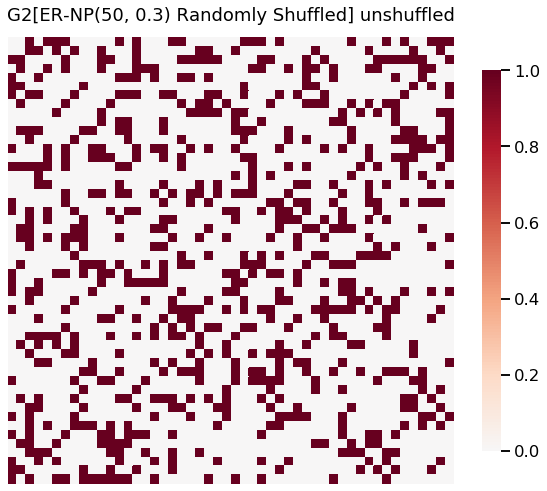

In [34]:
heatmap(G1, title = 'G1[ER-NP(50, 0.3) Simulation]')
heatmap(G2, title = 'G2[ER-NP(50, 0.3) Randomly Shuffled] unshuffled')